In [ ]:
# # Agustina comments
# # =====================
# # Need to install cartopy

# !pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# import cartopy.crs as ccrs

In this first tutorial we will have look at the distribution of annual extreme precipitation levels in Germany. Our task is to have a look at the different moments of the distribution: the mean, variance, skewness. 

First open the precipitation record and plot it over time: 


In [ ]:
# Agustina comments
# =====================
# Mount Google Drive locally to open the data
from google.colab import drive
drive.mount('/content/drive/')
data_dir = '/content/drive/Shared drives/Academy/Courses/Climate/Climatematch/02-Curriculum/Climatematch Content Folder/W2D4 - Climate Response - Extremes & Variability/W2D4 Tutorials/'

data = pd.read_csv(data_dir + 'precipitationGermany_1920-2022.csv',index_col=0).set_index('years')
data.columns=['precipitation']
precipitation = data.precipitation

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
precipitation

years
1920    24.5
1921    27.7
1922    15.6
1923    23.5
1924    59.9
        ... 
2018    31.6
2019    24.9
2020    33.3
2021    57.4
2022    25.4
Name: precipitation, Length: 103, dtype: float64

Text(0, 0.5, 'precipitation')

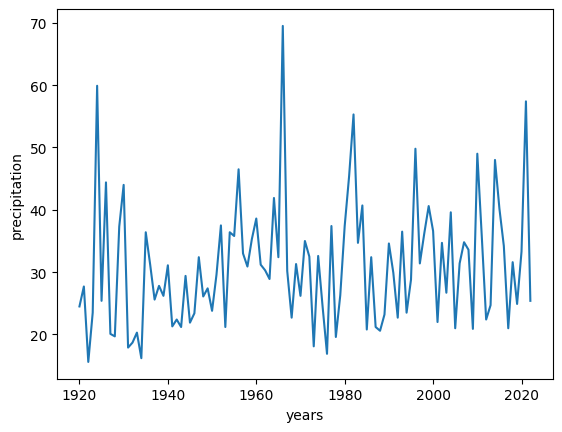

In [ ]:
precipitation.plot()#(x='years',y='rr')
plt.ylabel('precipitation')

Now create a variable that contains only the vector and plot a histogram of the data.

Text(0.5, 0, 'precipitation')

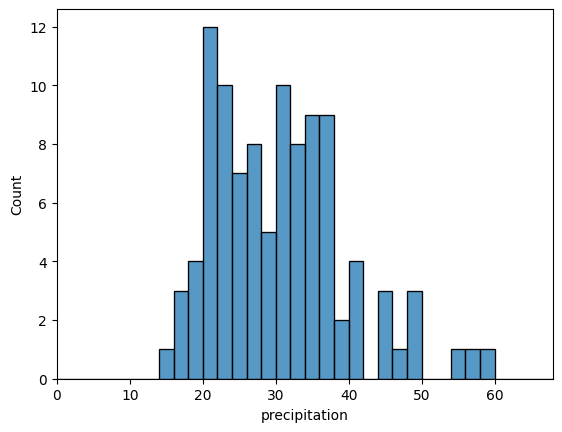

In [ ]:
bins=np.arange(0,precipitation.max(),2)
sns.histplot(precipitation,bins=bins)
plt.xlim(bins[0],bins[-1])
plt.xlabel('precipitation')

Next compute the mean and the variance... Plot the mean as a verticle line in the histogram

In [ ]:
mean_pr = precipitation.mean()
var_pr = precipitation.var()
std_pr = precipitation.std()

In [ ]:
mean_pr, var_pr, std_pr

(30.97184466019418, 98.55047401484865, 9.92725913910021)

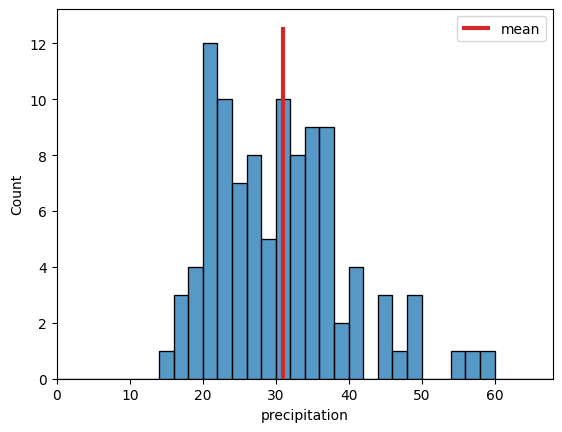

In [ ]:
bins=np.arange(0,precipitation.max(),2)
sns.histplot(precipitation,bins=bins)
plt.xlim(bins[0],bins[-1])

ylim = plt.ylim()

plt.vlines(mean_pr,ymin=ylim[0],ymax=ylim[1],color='C3',lw=3,label='mean')
plt.xlabel('precipitation')
plt.legend()

As you can see the range of values on both sides of the the line is not equal. This hint at a skewed distribution. Lets check how big the potential skew is. Also generate a 100 random values from a normal distribution (mean = 0, standard deviation = 1) and compare its skewness that of precipitation:

In [ ]:
precipitation.skew()

1.1484425874858337

In [ ]:
data['random'] = np.random.normal(0,1,size=data.index.size)

In [ ]:
data.skew()

precipitation    1.148443
random           0.302262
dtype: float64

As you can see the skewness of our data is much larger than the data extracted from a normal distribution. To further explore this we can fit a normal distribution to our precipitation data. For this we need to compute mean and standard deviation of 'precipitation'which are the two parameters of a normal distribution. Using the scipy function norm.pdf we can draw a probability density function (pdf) next to our histogram. The pdf shows the probability we will find any level of precipitation based on the data. As you can expect the mean value will have the highest probability. 

In [ ]:
from scipy import stats

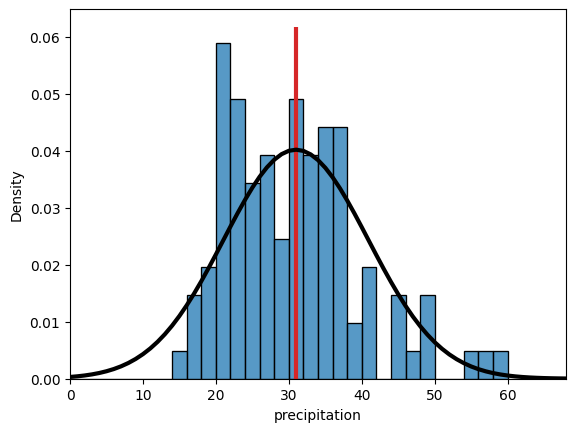

In [ ]:
bins=np.arange(0,precipitation.max(),2)
sns.histplot(precipitation,bins=bins,stat='density')
plt.xlim(bins[0],bins[-1])

ylim = plt.ylim()

plt.vlines(mean_pr,ymin=ylim[0],ymax=ylim[1],color='C3',lw=3)

x = np.arange(0,100,1)
plt.plot(x,stats.norm.pdf(x,mean_pr,std_pr),c='k',lw=3)

Let's add some uncertainty

In [ ]:
random_samples = np.random.normal(mean_pr,std_pr,size=[100,1000])
pdfs = np.zeros([x.size,1000])

for i in range(1000):
    pdfi = stats.norm.pdf(x,random_samples[:,i].mean(),random_samples[:,i].std())
    pdfs[:,i] = pdfi
    # plt.plot(x,pdfi,lw=1,alpha=0.05,c='C2')

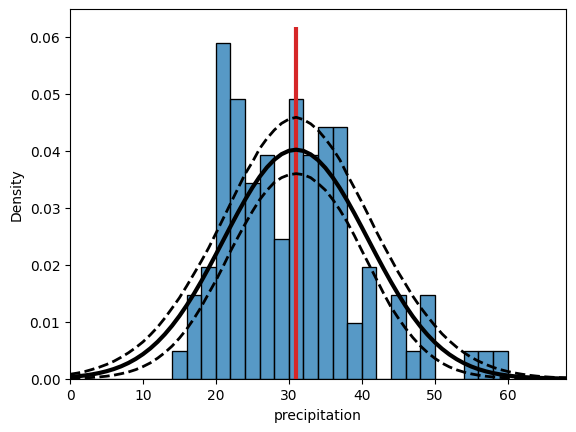

In [ ]:
bins=np.arange(0,precipitation.max(),2)
sns.histplot(precipitation,bins=bins,stat='density')
plt.xlim(bins[0],bins[-1])

ylim = plt.ylim()

plt.vlines(mean_pr,ymin=ylim[0],ymax=ylim[1],color='C3',lw=3)

x = np.arange(0,100,1)
plt.plot(x,stats.norm.pdf(x,mean_pr,std_pr),c='k',lw=3)

plt.plot(np.quantile(pdfs,0.95,axis=1),'--',lw=2,color='k')
plt.plot(np.quantile(pdfs,0.05,axis=1),'--',lw=2,color='k')

Does your normal distribution describe your model well?
